In [4]:
import numpy as np 
import pandas as pd 
import requests 
import json 
import tweepy 
import matplotlib.pyplot as plt 
import re
% matplotlib inline 

# Gathering Data 

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#download the image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [6]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## twitter API 
# my  reference :  https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [8]:
consumer_key = 'HIDDEN' 
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:
#Download Tweepy 
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 734
Rate limit reached. Sleeping for: 732


In [10]:
# this code from my reference on link blow too
#now split josn file from tweepy  
dicts = []
for tweet in list_of_tweets:
    dicts.append(tweet)
# write this list into a txt file 
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(dicts, indent=4))
    
    
    

In [11]:
#this code  also from my reference on link blow to identify data of interest from JSON dictionaries in txt file
my_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [12]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [13]:
# print the tweets we can not find it 
print (len(cant_find_tweets_for_those_ids))

25


In [14]:
tweet_json.tail(2)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2329,666029285002620928,117,41,8982727,16,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI
2330,666020888022790149,2342,443,8982727,16,Twitter for iPhone,Original tweet,https://t.co/BLDqew2Ijj


# Assessing data 

### assessing (twitter_archive) 

In [15]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_archive.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [20]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Quality 

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers not float but i think it useless data because it 78 , 181 non null data  in 2356 rows too much missing data 

- timestamp should be date not string or object and retweeted_status_timestamp too but it has too much missing values


- source is diffcult to read 

- rating_numerator and rating_denominator have invalid data like 0 or numbers less than 10 

- tweet id should be object 

#### Tidiness

- Create one column for  dog stage : (doggo, floofer, pupper, puppo) 


### assessing (image_prediction)

In [21]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
image_prediction[image_prediction['img_num']==4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


####  Quality 

- p1,p2,p3 are not lower or uppercase

- img_num column does not contain new data i think it useless

#### Tidiness 

- the prediction should be in one column called (dog_breed) and prediction confidence too in one column called (pred_confidence)

- i think should merge this data to (twitter_archive) 



### assessing (tweet_json)


In [26]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34986,7341,8982625,16,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30294,5478,8982625,16,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22789,3621,8982625,16,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38251,7530,8982625,16,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36532,8110,8982625,16,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [27]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [28]:
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2331.000000,2331.000000,2.331000e+03,2331.0
mean,7305.687259,2585.163878,8.982675e+06,16.0
std,11347.846239,4373.086855,5.977381e+01,0.0
min,0.000000,1.000000,8.982625e+06,16.0
25%,1265.000000,524.500000,8.982630e+06,16.0
50%,3167.000000,1205.000000,8.982675e+06,16.0
75%,8934.500000,2993.000000,8.982684e+06,16.0
max,150369.000000,74193.000000,8.983245e+06,16.0


In [29]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

In [30]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [31]:
tweet_json.url.value_counts()

This is a retweet          163
0                           16
s                            5
u                            5
e                            4
t                            3
y                            3
n                            3
C                            2
5                            2
https://t.co/roqIxCvEB3      2
g                            2
https://t.co/DpCSVsl6vu      1
https://t.co/8tjnz1L8DI      1
https://t.co/AxSiqAKEKu      1
https://t.co/7LtjBS0GPK      1
https://t.co/fZRob6eotY      1
https://t.co/ELqelxWMrC      1
https://t.co/yWBqbrzy8O      1
https://t.co/LUFnwzznaV      1
https://t.co/cUxGtnBfc2      1
https://t.co/0THNOfv2Jo      1
https://t.co/J5Mqn8VeYq      1
https://t.co/bbta2Q4URK      1
https://t.co/soNL00XWVu      1
https://t.co/gFl60yFJ0w      1
https://t.co/JSmX1FIEaW      1
https://t.co/kRK51Y5ac3      1
https://t.co/VagYftZccT      1
https://t.co/Rxrd4hPmp4      1
                          ... 
https://t.co/YqbU9xHV3p      1
https://

#### Quality
- should keep Original tweet 
- url has some invalid data like (0 , u , e , y , n , t , elc)


#### Tidiness
- should join to twitter_archive 

# Clean Data 

In [32]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_info_clean = tweet_json.copy()

#### Define

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp have too  much missing value  

- timestamp should be date not string or object

- tweet id should be object

- source is diffcult to read so I will drop it and merge soruse in tweet_info or tweet_json with twitter_archive_claen

- drop expanded_urls because the url exist in tweet_info 

- drop name because i think it has no use because name of dog in text of tweet 


#### code 

In [33]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id','source','name','expanded_urls'],axis=1)

In [34]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)


In [35]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 165.7+ KB


#### Define
- Create one column for dog age : (doggo, floofer, pupper, puppo)

### code

In [37]:
#twitter_archive_clean.dropna()
#twitter_archive_clean= pd.melt(twitter_archive_clean,id_vars=['tweet_id','timestamp','text','expanded_urls','rating_numerator','rating_denominator'],var_name = 'dog_type')
# 'melt ' will duplicated the data and it will bad choose 
twitter_archive_clean.loc[twitter_archive_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})
twitter_archive_clean['dog_age'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.dog_age == 'doggopupper', 'dog_age'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_age == 'doggopuppo', 'dog_age'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_age == 'doggofloofer', 'dog_age'] = 'doggo,floofer'

twitter_archive_clean.loc[twitter_archive_clean.dog_age == '', 'dog_age'] = 'Unknown'

twitter_archive_clean=twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
dog_age               2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 110.5+ KB


In [39]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_age
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Unknown
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Unknown
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Unknown
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Unknown
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Unknown


#### Define
- fix  wrong rate in rating_numerator and rating_denominator	

#### code

 ###### my refcance to code below : https://docs.python.org/3/library/re.html

In [40]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]
## (\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*) this is regex expression
# to get wrong rate 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_age
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,5,10,Unknown
340,832215909146226688,2017-02-16 13:11:49,"RT @dog_rates: This is Logan, the Chow who liv...",75,10,Unknown
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75,10,Unknown
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,pupper
1689,681340665377193984,2015-12-28 05:07:27,I've been told there's a slight possibility he...,5,10,Unknown
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,26,10,Unknown


In [41]:
rate = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rate

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [42]:
twitter_archive_clean['rating_numerator'] = rate[0]
twitter_archive_clean['rating_denominator']= rate[1]

#### test 

In [43]:
print(twitter_archive_clean.text.loc[45])
print(twitter_archive_clean.loc[45])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
text                  This is Bella. She hopes her smile made you sm...
rating_numerator                                                   13.5
rating_denominator                                                   10
dog_age                                                         Unknown
Name: 45, dtype: object


#### Define
- p1,p2,p3 are not lower or uppercase

- drop img num i think is useless 


#### code 

In [44]:
image_prediction_clean = image_prediction_clean.drop (['img_num'],axis= 1 )

In [45]:
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype(str)
image_prediction_clean['p1']=image_prediction_clean.p1.str.lower()
image_prediction_clean['p2']=image_prediction_clean.p2.str.lower()
image_prediction_clean['p3']=image_prediction_clean.p3.str.lower()


#### test 

In [46]:
image_prediction_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define 
- the prediction should be in one column called (dog_breed) and prediction confidence too in one column called (pred_confidence) 

#### code 

In [47]:
pred = []
conf = []
def dog_breed (df) :
    if (df['p1_conf']>df['p2_conf'])and(df['p1_conf']>df['p3_conf']) :
        if df['p1_dog']==True :
            pred.append(df['p1'])
            conf.append(max (df['p1_conf'],df['p2_conf'],df['p3_conf']))
        elif df['p2_dog']==True :
            pred.append(df['p2'])
            conf.append(max(df['p2_conf'],df['p3_conf']))
        elif df['p3_dog']==True:
            pred.append(df['p3'])
            conf.append(df['p3_conf'])
        else :
            pred.append("None")
            conf.append(0)
            
    elif (df['p2_conf']>df['p1_conf'])and(df['p2_conf']>df['p3_conf']) :
        if df['p2_dog']==True :
            pred.append(df['p2'])
            conf.append(max (df['p2_conf'],df['p1_conf'],df['p3_conf']))
        elif df['p1_dog']==True :
            pred.append(df['p1'])
            conf.append(max(df['p1_conf'],df['p3_conf']))
        elif df['p3_dpg']==True:
            pred.append(df['p3'])
            conf.append(df['p3_conf'])
        else :
            pred.append("None")
            conf.append(0)
    elif (df['p3_conf']>df['p1_conf'])and(df['p3_conf']>df['p2_conf']) :
        if df['p3_dog']==True :
            pred.append(df['p3'])
            conf.append(max (df['p3_conf'],df['p1_conf'],df['p2_conf']))
        elif df['p1_dog']==True :
            pred.append(df['p1'])
            conf.append(max(df['p1_conf'],df['p2_conf']))
        elif df['p2_dog']==True:
            pred.append(df['p2'])
            conf.append(df['p2_conf'])
        else :
            pred.append("None")
            conf.append(0)    
            
        
image_prediction_clean.apply(dog_breed,axis=1)
image_prediction_clean['dog_breed']=pred
image_prediction_clean['pred_confidence']=conf

In [48]:
#drop the columns we are deal 
image_prediction_clean = image_prediction_clean.drop([ 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
                                                    'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis = 1)


#### test

In [49]:
image_prediction_clean.head()

,tweet_id,jpg_url,dog_breed,pred_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [50]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id           2075 non-null object
jpg_url            2075 non-null object
dog_breed          2075 non-null object
pred_confidence    2075 non-null float64
dtypes: float64(1), object(3)
memory usage: 64.9+ KB


#### Define
- should keep Original tweet should drop retweeted_status
- url has some invalid data like (0 , u , e , y , n , t , elc)

#### code

In [51]:
tweet_info_clean.drop(tweet_info_clean[tweet_info_clean['retweeted_status']=='This is a retweet'].index,inplace=True)
url_list=['0','u','s','e','y','t','g','C','5','n']
for val in url_list :
    tweet_info_clean.drop(tweet_info_clean[tweet_info_clean['url']==val].index,inplace=True)
   

In [52]:
tweet_info_clean=tweet_info_clean.drop(['retweeted_status'],axis=1)

#### test

In [55]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2330
Data columns (total 7 columns):
tweet_id           2123 non-null object
favorite_count     2123 non-null int64
retweet_count      2123 non-null int64
followers_count    2123 non-null int64
friends_count      2123 non-null int64
source             2123 non-null object
url                2123 non-null object
dtypes: int64(4), object(3)
memory usage: 132.7+ KB


In [56]:
tweet_info_clean.url.value_counts()

https://t.co/roqIxCvEB3    2
https://t.co/dgvTPZ9tgI    1
https://t.co/J5Mqn8VeYq    1
https://t.co/FQZGSQIQLS    1
https://t.co/kRK51Y5ac3    1
https://t.co/gFl60yFJ0w    1
https://t.co/8tjnz1L8DI    1
https://t.co/soNL00XWVu    1
https://t.co/bbta2Q4URK    1
https://t.co/cUxGtnBfc2    1
https://t.co/7JdgVqDnvR    1
https://t.co/LUFnwzznaV    1
https://t.co/yWBqbrzy8O    1
https://t.co/ELqelxWMrC    1
https://t.co/fZRob6eotY    1
https://t.co/AxSiqAKEKu    1
https://t.co/c9jmg3Xtzn    1
https://t.co/V62rIva61J    1
https://t.co/I7bkhxBxUG    1
https://t.co/tyER0KpdXj    1
https://t.co/J4Q5YjzLH0    1
https://t.co/JSmX1FIEaW    1
https://t.co/DpCSVsl6vu    1
https://t.co/cxl6xGY8B9    1
https://t.co/VagYftZccT    1
https://t.co/0THNOfv2Jo    1
https://t.co/7LtjBS0GPK    1
https://t.co/FS7eJQM2F4    1
https://t.co/WjcELNEqN2    1
https://t.co/mnioXo3IfP    1
                          ..
https://t.co/bxjO45rXKd    1
https://t.co/8rpIJr9sAC    1
https://t.co/Dfv2YaHPMn    1
https://t.co/0

#### Define
- merge to twitter_archive

#### code

In [57]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_info_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [59]:
twitter_archive_clean = twitter_archive_clean.merge(image_prediction_clean, on='tweet_id', how='inner')

#### test

In [60]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_age,favorite_count,retweet_count,followers_count,friends_count,source,url,jpg_url,dog_breed,pred_confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Unknown,34986,7341,8982625,16,Twitter for iPhone,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Unknown,30294,5478,8982625,16,Twitter for iPhone,https://t.co/aQFSeaCu9L,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Unknown,22789,3621,8982625,16,Twitter for iPhone,https://t.co/r0YlrsGCgy,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Unknown,38251,7530,8982625,16,Twitter for iPhone,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Unknown,36532,8110,8982625,16,Twitter for iPhone,https://t.co/0g0KMIVXZ3,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [61]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 15 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
text                  1987 non-null object
rating_numerator      1987 non-null object
rating_denominator    1987 non-null object
dog_age               1987 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
followers_count       1987 non-null int64
friends_count         1987 non-null int64
source                1987 non-null object
url                   1987 non-null object
jpg_url               1987 non-null object
dog_breed             1987 non-null object
pred_confidence       1987 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(9)
memory usage: 248.4+ KB


### Store data 


In [62]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

# Analyzing & Visualizing Data 

In [68]:
df = pd.read_csv('twitter_archive_master.csv')
df['tweet_id']=df['tweet_id'].astype(str)

In [69]:
df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,dog_age,favorite_count,retweet_count,followers_count,friends_count,source,url,jpg_url,dog_breed,pred_confidence
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Unknown,34986,7341,8982625,16,Twitter for iPhone,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Unknown,30294,5478,8982625,16,Twitter for iPhone,https://t.co/aQFSeaCu9L,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Unknown,22789,3621,8982625,16,Twitter for iPhone,https://t.co/r0YlrsGCgy,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Unknown,38251,7530,8982625,16,Twitter for iPhone,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Unknown,36532,8110,8982625,16,Twitter for iPhone,https://t.co/0g0KMIVXZ3,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,Unknown,18426,2715,8982625,16,Twitter for iPhone,https://t.co/xx5cilW0Dd,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Unknown,10719,1757,8982625,16,Twitter for iPhone,https://t.co/MV01Q820LT,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,Unknown,58937,16465,8982625,16,Twitter for iPhone,https://t.co/hrcFOGi12V,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Unknown,25356,3768,8982625,16,Twitter for iPhone,https://t.co/UkrdQyoYxV,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,doggo,28937,6375,8982625,16,Twitter for iPhone,https://t.co/l3TSS3o2M0,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 15 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null object
text                  1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null int64
dog_age               1987 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
followers_count       1987 non-null int64
friends_count         1987 non-null int64
source                1987 non-null object
url                   1987 non-null object
jpg_url               1987 non-null object
dog_breed             1987 non-null object
pred_confidence       1987 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 232.9+ KB


In [70]:
df.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,followers_count,friends_count,pred_confidence
count,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.0,1987.000000
mean,12.236930,10.533971,7994.838450,2348.078510,8.982679e+06,16.0,0.463913
std,41.544174,7.333532,11777.391548,4201.621778,6.082428e+01,0.0,0.339364
min,0.000000,2.000000,69.000000,11.000000,8.982625e+06,16.0,0.000000
25%,10.000000,10.000000,1710.500000,526.000000,8.982631e+06,16.0,0.140041
50%,11.000000,10.000000,3616.000000,1136.000000,8.982676e+06,16.0,0.457356
75%,12.000000,10.000000,9924.500000,2672.500000,8.982723e+06,16.0,0.776138
max,1776.000000,170.000000,150369.000000,74193.000000,8.983245e+06,16.0,0.999956


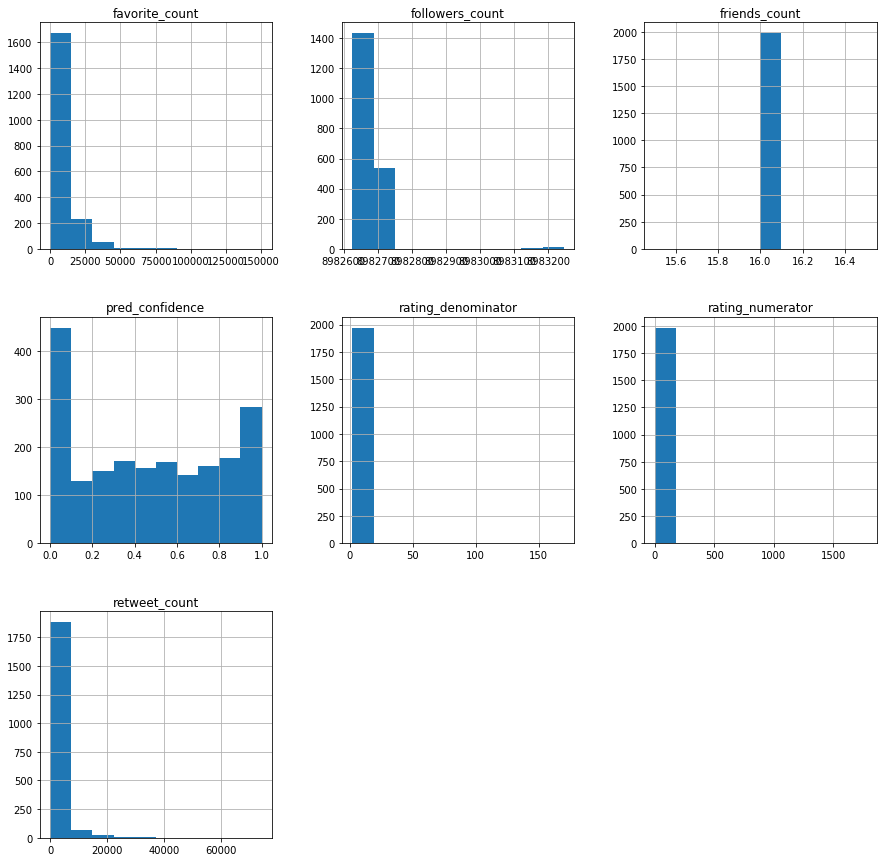

In [71]:
df.hist(figsize=(15,15));

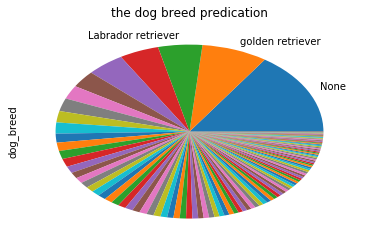

In [83]:
labels = np.full(len(df.dog_breed.value_counts()),"",dtype=object)
labels[0]='None'
labels[1]='golden retriever'
labels[2]='Labrador retriever'
df['dog_breed'].value_counts().plot(kind = 'pie',labels=labels)
#plt.Figure(15,15)
plt.title("the dog breed predication")
plt.show()


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=16.0, right=16.0
  'left=%s, right=%s') % (left, right))
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=16.0, top=16.0
  'bottom=%s, top=%s') % (bottom, top))


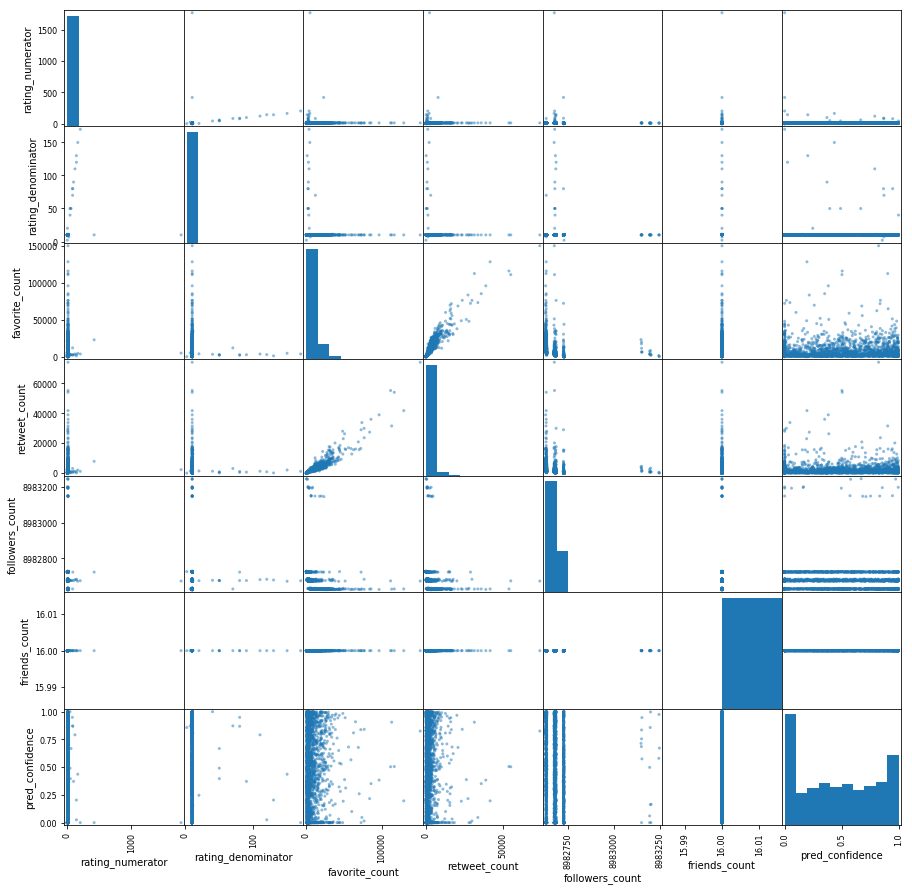

In [84]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

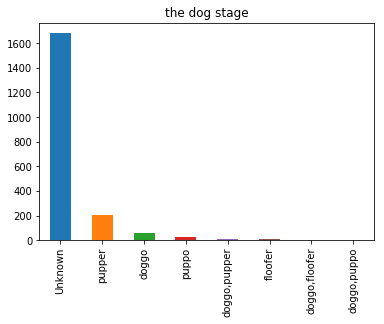

In [87]:
df.dog_age.value_counts().plot(kind = 'bar')
#plt.Figure(15,15)
plt.title("the dog stage")
plt.show()
